In [96]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [97]:
data = pd.read_csv('dataset/endeCardi.csv',delimiter=',')
data = pd.DataFrame(data)
data = data.drop(columns = ["index"])

data = data.to_numpy()

In [98]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# contiene la etiqueta que indica si el alumno ingreso o no a la universidad.
X, y = data[:, 0:15], data[:, 15]
m, n = X.shape

In [99]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y 
    # o para los negativos.
    
    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    for i in range(n//2):
        pyplot.plot(X[pos, i], X[pos, i+n//2], 'k*', lw=2, ms=10)
        pyplot.plot(X[neg, i], X[neg, i+n//2], 'ko', mfc='y', ms=8, mec='k', mew=1)

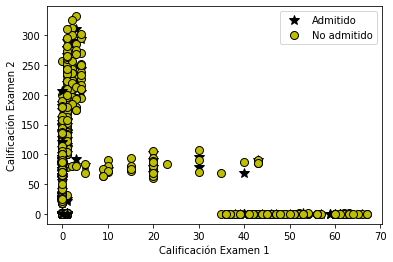

In [100]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass

In [101]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [102]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 

# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [103]:
"""def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    #h = sigmoid(X.dot(theta.T))
    #J = -(1 / m) * np.sum(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T*np.log(h) - (1 - y).T * np.log(1 - h)) 
    return J"""

def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [104]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente:
 [-0.00477849 -0.00391354  0.03414209  0.00125855 -0.01146559  0.02377404
  0.00894876  0.          0.02471121 -0.00134954 -0.00571301  0.01094233
  0.01002015 -0.06400135 -0.03972541  0.00315277]
Un estudiante con nota del examen 1: 45 y nota del examen 2: 27 (usando el descenso por el gradiente):0


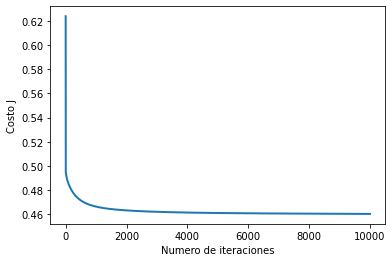

In [105]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(n+1)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)),J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:\n {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('Un estudiante con nota del examen 1: 45 y nota del examen 2: 27 (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [106]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [107]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 3.08333333e-01  1.20833333e-01  1.46416667e+01  5.87500000e-01
  1.58333333e-01  2.73333333e+00 -4.16666667e-03  0.00000000e+00
  8.33333333e-02  1.25000000e-02  7.26500000e+01  4.01500000e+01
  2.50708333e+01  8.13933333e+00  2.34666667e+01  2.31208333e+01]
Gradiente en theta inicial (zeros):
	[0.3083, 0.1208, 14.6417]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [108]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.ones(n+1)
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.808, 0.308, 39.467]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]
<ipython-input-106-1a3084f56ce3>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
